In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, Dropout, BatchNormalization, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [2]:
!git clone https://github.com/laxmimerit/Movie-Poster_dataset.git

Cloning into 'Movie-Poster_dataset'...
remote: Repository not found.
fatal: repository 'https://github.com/laxmimerit/Movie-Poster_dataset.git/' not found


In [3]:
!git clone https://github.com/laxmimerit/Movies-Poster_Dataset.git

fatal: destination path 'Movies-Poster_Dataset' already exists and is not an empty directory.


In [4]:
data = pd.read_csv('/Users/stefanflorin/Movies-Poster_Dataset/train.csv')

In [5]:
data.head()

,Id,Genre,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,...,N/A,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,tt0086425,"['Comedy', 'Drama']",0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,tt0085549,"['Drama', 'Romance', 'Music']",0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,tt0086465,['Comedy'],0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,tt0086567,"['Sci-Fi', 'Thriller']",0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,tt0086034,"['Action', 'Adventure', 'Thriller']",1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [6]:
data.shape

(7254, 27)

In [7]:
img_width = 350
img_height = 350

X = []

for i in tqdm(range(data.shape[0])):
    path = '/Users/stefanflorin/Movies-Poster_Dataset/Images/' + data['Id'][i] + '.jpg'
    img = image.load_img(path, target_size=(img_height, img_width, 3))
    img = image.img_to_array(img)
    img = img/255.0
    X.append(img)
    
X = np.array(X)

100%|██████████| 7254/7254 [00:53<00:00, 136.34it/s]


In [8]:
X.shape

(7254, 350, 350, 3)

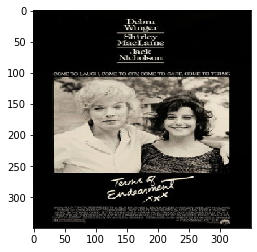

In [9]:
plt.imshow(X[0])
plt.show()

In [10]:
data['Genre'][0]

"['Comedy', 'Drama']"

In [11]:
y = data.drop(columns=['Id', 'Genre'], axis=1)
y = y.to_numpy()
y.shape

(7254, 25)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape, y_train.shape

((5803, 350, 350, 3), (5803, 25))

In [13]:
X_train[0].shape

(350, 350, 3)

In [14]:
model = Sequential()
model.add(Conv2D(16, (3,3), input_shape=(350, 350, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.5))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.5))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.5))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))


model.add(Dense(25, activation='sigmoid'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 348, 348, 16)      448       
_________________________________________________________________
batch_normalization (BatchNo (None, 348, 348, 16)      64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 174, 174, 16)      0         
_________________________________________________________________
dropout (Dropout)            (None, 174, 174, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 172, 172, 32)      4640      
_________________________________________________________________
batch_normalization_1 (Batch (None, 172, 172, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 86, 86, 32)        0

In [16]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [17]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5)

Train on 5803 samples, validate on 1451 samples
Epoch 1/5
5803/5803 [==============================] - 581s 100ms/sample - loss: 0.7049 - accuracy: 0.6386 - val_loss: 3.0913 - val_accuracy: 0.5564
Epoch 2/5
5803/5803 [==============================] - 588s 101ms/sample - loss: 0.3214 - accuracy: 0.8881 - val_loss: 0.3572 - val_accuracy: 0.9037
Epoch 3/5
5803/5803 [==============================] - 628s 108ms/sample - loss: 0.2660 - accuracy: 0.9049 - val_loss: 0.3968 - val_accuracy: 0.8925
Epoch 4/5
5803/5803 [==============================] - 594s 102ms/sample - loss: 0.2541 - accuracy: 0.9084 - val_loss: 0.3642 - val_accuracy: 0.9039
Epoch 5/5
5803/5803 [==============================] - 602s 104ms/sample - loss: 0.2494 - accuracy: 0.9094 - val_loss: 0.2837 - val_accuracy: 0.9023


[[0.15330341 0.08993256 0.00747272 0.07443929 0.12617812 0.13021821
  0.06582335 0.63054496 0.02624565 0.07703868 0.02739903 0.11251956
  0.02127767 0.00856754 0.1100896  0.008194   0.00392535 0.00354388
  0.14292061 0.08283824 0.00736949 0.02281144 0.22427824 0.0154655
  0.0086448 ]]
[18  0 22]


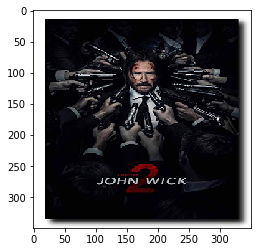

In [22]:
poza = image.load_img('/Users/stefanflorin/Desktop/movie-genre-from-its-poster/johnwick2.jpg', target_size=(img_height, img_width, 3))
plt.imshow(poza)
poza = image.img_to_array(poza)
poza = poza/255.0

poza = poza.reshape(1, img_width, img_height, 3)

classes = data.columns[2:]

y_prob = model.predict(poza)
print(y_prob)
arg = y_prob.argsort()
print(arg[0][-4:-1])